## EDA on geotagged tweets
#### Build basics of extracting key words, sentiments about crowdedness. Label the tweets. Look at frequency of tweets over time. Pay attention to the time the tweet was posted but also when it was referring to. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df = pd.read_pickle("park_tweets.pkl")

In [3]:
df.head()

,date,text,day_of_week,hour
date,,,,
2019-12-31 22:00:04-05:00,2019-12-31 22:00:04-05:00,人还很少 #NYE2020 – at Prospect Park,Tuesday,22
2019-12-31 23:00:44-05:00,2019-12-31 23:00:44-05:00,Baby 出现了，家庭友好的新年庆祝 #NYE2020 #brooklyn #NYC – a...,Tuesday,23
2019-12-31 23:51:00-05:00,2019-12-31 23:51:00-05:00,"""New Year in Space"" Illo for the Washington Po...",Tuesday,23
2019-12-31 23:52:13-05:00,2019-12-31 23:52:13-05:00,"""New Year Countdown"" Illo for NEW YORK PRESS D...",Tuesday,23
2020-01-01 00:11:44-05:00,2020-01-01 00:11:44-05:00,2019 再见，2020 新的十年开始。19年还是不错，追求不多所以收获也没多少，只是简单的...,Wednesday,0


In [4]:
daily_counts = df.text.resample('d').count()

In [5]:
daily_counts.head()

date
2019-12-31 00:00:00-05:00     4
2020-01-01 00:00:00-05:00    14
2020-01-02 00:00:00-05:00     6
2020-01-03 00:00:00-05:00     5
2020-01-04 00:00:00-05:00     8
Freq: D, Name: text, dtype: int64

In [6]:
import pytz
from pytz import timezone
est = pytz.timezone('US/Eastern')
today = dt.datetime.now(est)
start= min(df.date)
ticks = pd.date_range(start=start,end=today, freq = 'W')

In [7]:
min(df.date)

Timestamp('2019-12-31 22:00:04-0500', tz='US/Eastern')

In [8]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(30,5))
plt.plot(daily_counts)
plt.xticks(ticks=ticks,rotation=90)
plt.title("Number of Tweets by Day")
plt.xlabel("date")
plt.ylabel("number of tweets")
plt.savefig("tweetcount.png", dpi=300, bbox_inches='tight')
plt.show()

/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 3000x500 with 1 Axes>

In [9]:
import pytz
est = timezone('US/Eastern')
crisis_startdate = est.localize(pd.to_datetime("2020-03-23 00:00:00"))
crisis_startdate

Timestamp('2020-03-23 00:00:00-0400', tz='US/Eastern')

In [10]:
len(df[df.date >= crisis_startdate])

206

In [11]:
df_corona = df[df.date >= crisis_startdate]

In [12]:
df_corona.to_pickle("./df_corona.pkl")

In [13]:
for i in range(len(df_corona)-10,len(df_corona)):
    print(i, ':', df_corona.iloc[i].date, ':', df_corona.iloc[i].text)

196 : 2020-04-07 21:20:43-04:00 : Hal Willner’s Doc Pomus Project @briccelebratebk 7/27/07 with Lou Reed, Laurie Anderson, Sharon Jones, Ben E. King, Eric Mingus http://et.al. The Hal Willner tribute should be one to remember. #covidnyc #halwillner @… https://www.instagram.com/p/B-s4PFwAvur/?igshid=f2vnyyvs2nsg
197 : 2020-04-07 22:12:05-04:00 : Alice Hellman, (American, 2006-present) "autoritratto senza titolo," 2020. @Park Slope Historic District https://www.instagram.com/p/B-s-HfHjmCn/?igshid=1kua4uccqmvs8
198 : 2020-04-08 09:42:59-04:00 : Hello from the colonies. #blessedbethefruit @MonaChalabi we had to act out the 6 ft tool. #COVIDー19 #Queerantine #nyccoronavirus #nycparks #coronavirus #CoronavirusPandemic #BROOKLYN – at Prospect Park
199 : 2020-04-08 10:14:51-04:00 : Tree tops on the N side of the Vale in @prospect_park is ALIVE w warbling activity, those of you with better binoculars should have luck there. Our feathered friends are singing w extra vigor w colors looking brillia

In [14]:
import re
distancing = []
for i in range(0,len(df_corona)):
    if re.match('.*(distancing)|(packed)|(crowd)|(busy)|(full)|(empty)|(quarantine).*',df_corona.iloc[i].text):
        distancing.append(1)

In [15]:
print("So far, there have been",len(distancing),"tweets related to the crowding level in Prospect Park.")

So far, there have been 16 tweets related to the crowding level in Prospect Park.


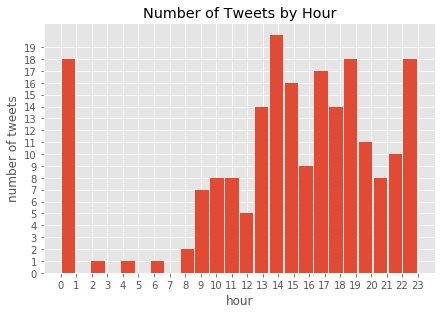

In [16]:
yticks=pd.Series(range(0,20))
xticks=pd.Series(range(0,24))

plt.hist(df_corona.hour, bins=24, rwidth=0.9)
plt.yticks(ticks=yticks)
plt.xticks(ticks=xticks)
plt.tight_layout()
plt.title("Number of Tweets by Hour")
plt.xlabel("hour")
plt.ylabel("number of tweets")
plt.savefig("tweethist_hr.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Graph tweet counts by hour, separating out the different days as different lines. 

days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
counts = {}

for day in days:
    day_df = df_corona[df_corona.day_of_week == day]
    day_count = np.zeros(24).astype('int')
    
    for i in range(0,24):
        day_count[i] = len(day_df[day_df.hour == i])

    counts[day] = day_count

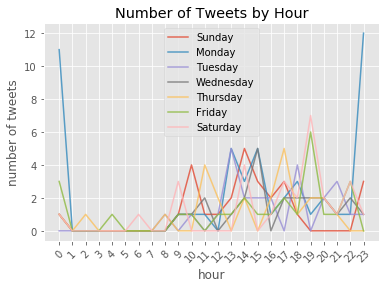

In [18]:
for day in days:
    plt.plot(counts[day],alpha=0.8)
    
plt.legend(days, loc='upper center')

# yticks=pd.Series(range(0,20))
xticks=pd.Series(range(0,24))
plt.xticks(ticks=xticks,rotation=45)
plt.xlabel("hour")
plt.ylabel("number of tweets")
plt.title("Number of Tweets by Hour")       
plt.savefig("tweets_by_hr_day.png", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
## Double check that these hours are correct -- time zone
## make a plot with hr on the x and # tweets on y, w line for each day of week

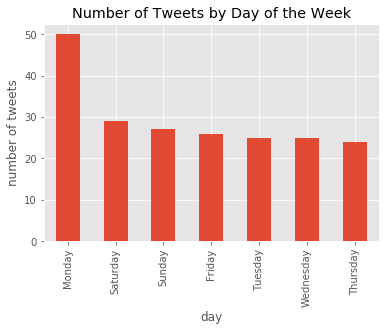

In [20]:
df_corona['day_of_week'].value_counts().plot(kind='bar')
plt.title("Number of Tweets by Day of the Week")
plt.xlabel("day")
plt.ylabel("number of tweets")
plt.savefig("tweethist_day.png", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# Reload for new session
df = pd.read_pickle("./df_corona.pkl")